In [0]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras

Populating the interactive namespace from numpy and matplotlib


# MNIST dataset

Load the MNIST data

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

Choose a random image and visualise it

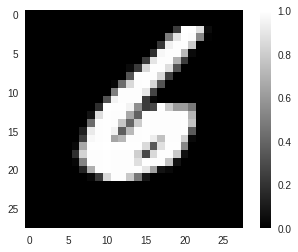

In [0]:
random_index = np.random.randint(0, len(x_train))
first_array=x_train[random_index]
plt.imshow(first_array, cmap='gray')
plt.colorbar()
plt.gca().grid(False)

# Tensorflow

Load Tensorflow

In [0]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
try:
  tf.enable_eager_execution()
  print('Running in Eager mode.')
except ValueError:
  print('Already running Eagerly')

Running in Eager mode.


Split data into train and test sets

In [0]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int64)

Create and train a neural network

In [0]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# model.compile(optimizer=tf.train.AdamOptimizer(),
#               loss=tf.keras.losses.sparse_categorical_crossentropy,
#               metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=5)
# model.evaluate(x_test, y_test)

# Fashion MNIST dataset

Load the Fashion MNIST data

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :,np.newaxis]
train_labels = train_and_validation_labels[:50000]


# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :,np.newaxis]
validation_labels = train_and_validation_labels[-10000:]

test_images = test_images[:,:,:,np.newaxis]


Choose a random image and visualise it

TypeError: ignored

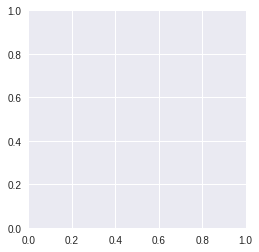

In [0]:
# We use the Matplotlib plotting library to visualise an image selected at random from the training set 
plt.figure()
random_index = np.random.randint(0, len(train_images)) 
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

In [0]:
# Normalize and prepare data

train_images = tf.convert_to_tensor(train_images, dtype=tf.float32) / 255.0
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int64)

validation_images = tf.convert_to_tensor(validation_images, dtype=tf.float32) / 255.0
validation_labels = tf.convert_to_tensor(validation_labels, dtype=tf.int64)

test_images = tf.convert_to_tensor(test_images, dtype=tf.float32) / 255.0
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int64)

In [0]:
#train model

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, kernel_size=(5, 5), activation=tf.nn.relu, input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32, kernel_size=5, activation=tf.nn.relu),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
   
    
  tf.keras.layers.Dense(412, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(300, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),  
    
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),    
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)  
])
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
model.evaluate(validation_images, validation_labels)

Epoch 1/5
1563/1563 [==============================] - 423s 271ms/step - loss: 0.4768 - acc: 0.8266
Epoch 2/5
1563/1563 [==============================] - 426s 273ms/step - loss: 0.3123 - acc: 0.8870
Epoch 3/5
1563/1563 [==============================] - 426s 273ms/step - loss: 0.2573 - acc: 0.9061
Epoch 4/5
1563/1563 [==============================] - 425s 272ms/step - loss: 0.2169 - acc: 0.9211
Epoch 5/5
313/313 [==============================] - 21s 68ms/step


[0.2709867211461067, 0.9055]

# CIFAR-10 MNIST dataset

Load the CIFAR-10 data

In [0]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Take the last 10000 images from the training set to form a validation set 
train_labels = train_labels.squeeze()
validation_images = train_images[-10000:, :, :]
validation_labels = train_labels[-10000:]
train_images = train_images[:-10000, :, :]
train_labels = train_labels[:-10000]

# Print shapes

print('train_images.shape = {}, data-type = {}'.format(train_images.shape, train_images.dtype))
print('train_labels.shape = {}, data-type = {}'.format(train_labels.shape, train_labels.dtype))

print('validation_images.shape = {}, data-type = {}'.format(validation_images.shape, validation_images.dtype))
print('validation_labels.shape = {}, data-type = {}'.format(validation_labels.shape, validation_labels.dtype))

170500096/170498071 [==============================] - 22s 0us/step
train_images.shape = (40000, 32, 32, 3), data-type = uint8
train_labels.shape = (40000,), data-type = uint8
validation_images.shape = (10000, 32, 32, 3), data-type = uint8
validation_labels.shape = (10000,), data-type = uint8


Visualise sampled images

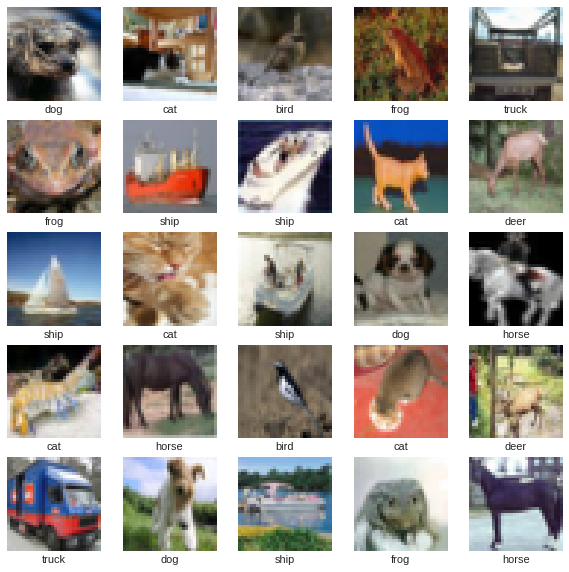

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  img_index = np.random.randint(0, 40000)
  plt.imshow(train_images[img_index])
  plt.xlabel(cifar_labels[train_labels[img_index]])

In [0]:
# Normalize and prepare data

train_images = tf.convert_to_tensor(train_images, dtype=tf.float32) / 255.0
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int64)

validation_images = tf.convert_to_tensor(validation_images, dtype=tf.float32) / 255.0
validation_labels = tf.convert_to_tensor(validation_labels, dtype=tf.int64)

test_images = tf.convert_to_tensor(test_images, dtype=tf.float32) / 255.0
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int64)


In [0]:
#train model

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(32,32,3)),
  tf.keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
   
    
  tf.keras.layers.Dense(412, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(300, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),  
    
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),    
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)  
])
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(validation_images, validation_labels))
model.evaluate(test_images, test_labels)

NameError: ignored